In [107]:
import numpy as np
import pandas as pd

In [108]:
df=pd.read_csv('/content/drive/MyDrive/learning_colab_datasets/insurance.csv')

In [109]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [110]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [112]:
df['sex'].value_counts() #maybe i need to transform it as i think it ll matter

,count
sex,
male,676
female,662


In [113]:
df['region'].value_counts() #maybe i need to transform it as i think it ll matter

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

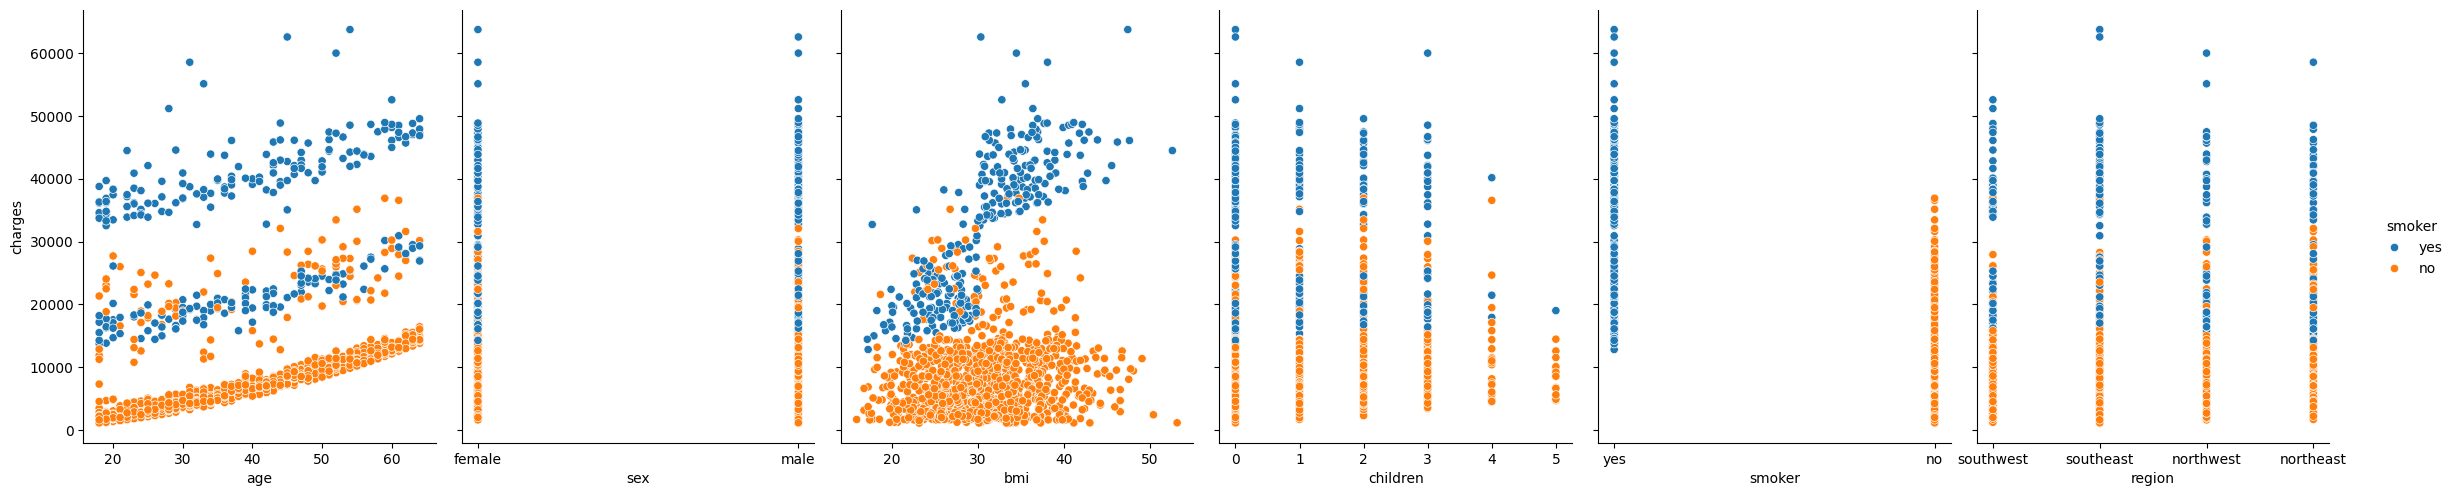

In [116]:


# Assuming your dataframe is named 'df'
# We define the columns we want to see on the X-axis
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

sns.pairplot(df,
             x_vars=features,
             y_vars=['charges'],
            hue='smoker',
             height=5,
             aspect=0.8,
             kind='scatter')

plt.show()
#smoking is a huge factor affecting the charges

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

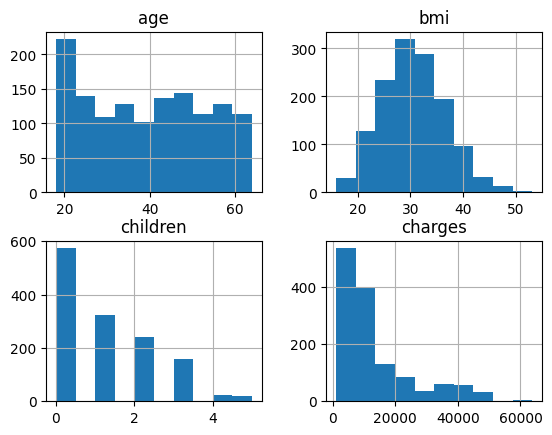

In [117]:
df.hist()

<Axes: >

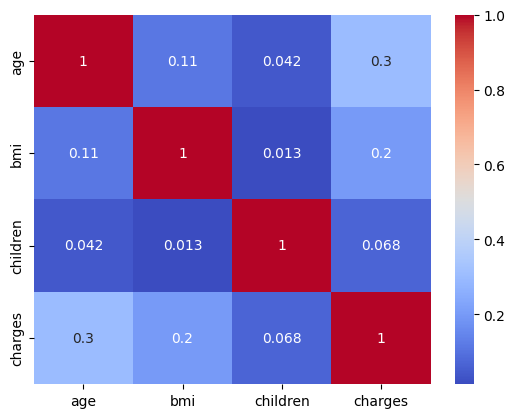

In [118]:
df_corr=df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

<Axes: xlabel='smoker', ylabel='charges'>

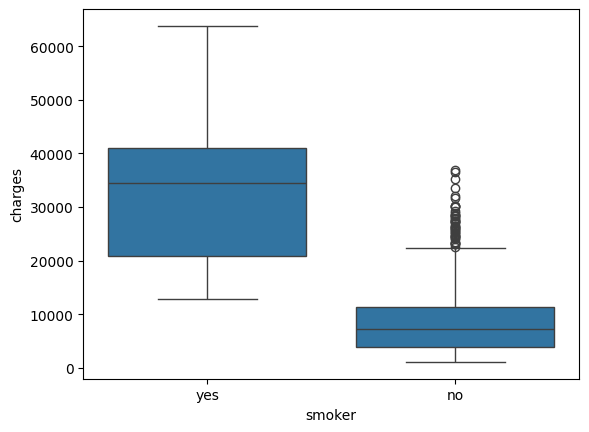

In [119]:
sns.boxplot(x='smoker', y='charges', data=df)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff38c3b2c30>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff392b9ec00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff392a7ad20>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff392b9d910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff392b9f9b0>],
 'means': []}

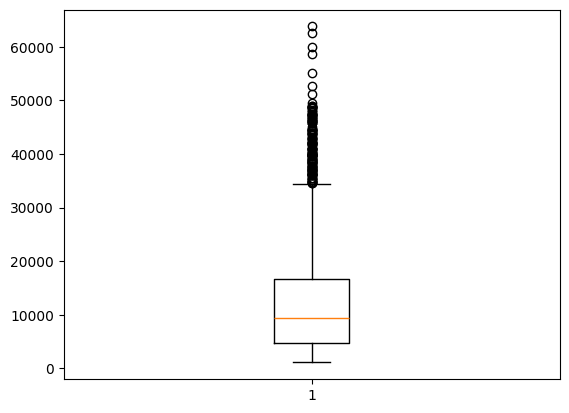

In [120]:
plt.boxplot(df['charges'])#outliers affect linear regression alot

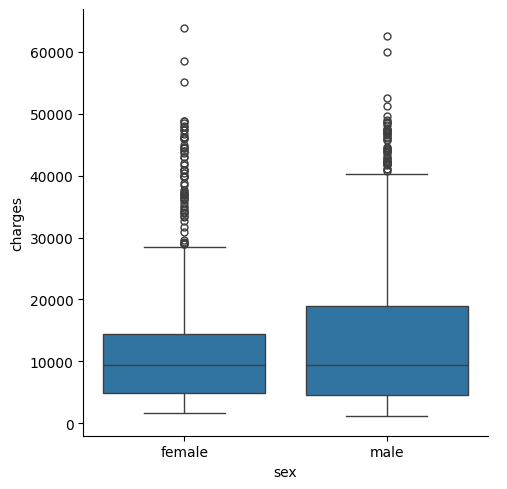

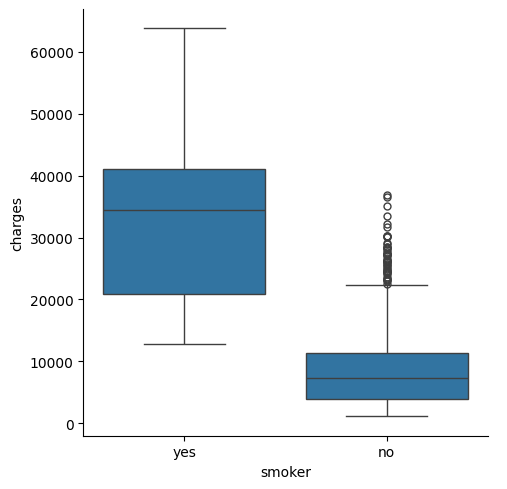

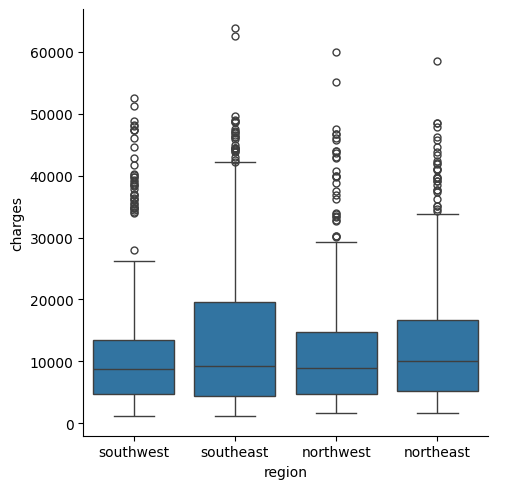

In [121]:
# This creates a row of plots comparing charges across different categories
for feature in ['sex', 'smoker', 'region']:
    sns.catplot(data=df, x=feature, y='charges', kind="box")

In [122]:
df.isnull().sum() #no nulls values

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [123]:
#my first model ,simple linear regression using age
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [124]:
x=df[['age']]
y=df['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=49)

In [125]:
model_AgevsCharges=LinearRegression()
model_AgevsCharges.fit(x_train,y_train)

LinearRegression()

In [126]:
y_pred=model_AgevsCharges.predict(x_test)

In [127]:
r2_score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(f'r2_score: {r2_score}')
print(f'mse: {mse}')
print(f'mae: {mae}')

r2_score: 0.14528812399141344
mse: 128135260.68303595
mae: 8986.834271812326


$R^2$ Score (0.145): This is quite low. It means age only explains about 14.5% of why insurance charges vary. The other 85.5% is caused by factors your model is currently "blind" to, like smoking or BMI.MAE (8,986): On average, your model’s predictions are off by nearly $9,000. If you predict a 23-year-old will pay $3,000, they might actually be paying $12,000.MSE (128M): Because this squares the errors, it heavily penalizes those "outliers" (the smokers) who are far away from your regression line.

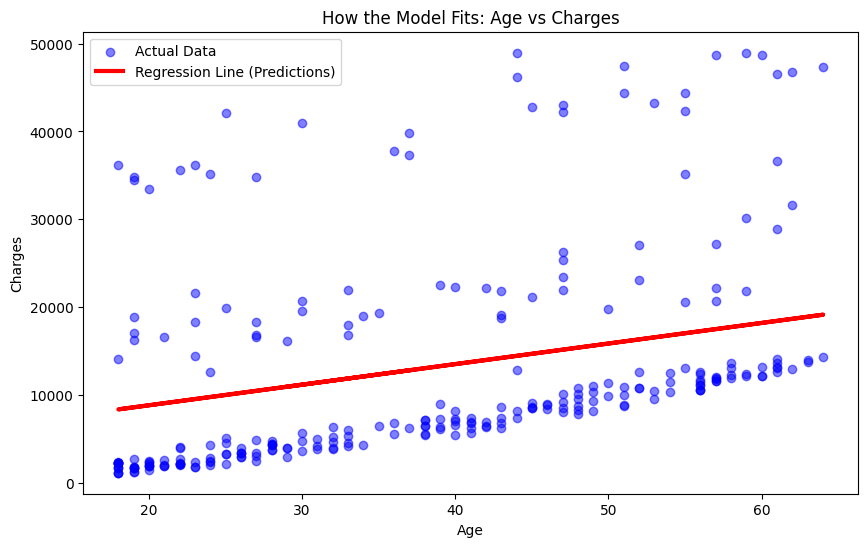

In [128]:


plt.figure(figsize=(10, 6))

# Plot the actual data points
plt.scatter(x_test, y_test, color='blue', alpha=0.5, label='Actual Data')

# Plot the regression line
plt.plot(x_test, y_pred, color='red', linewidth=3, label='Regression Line (Predictions)')

plt.title('How the Model Fits: Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

In [129]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [130]:
from sklearn.preprocessing import LabelEncoder
df_preprocessed=df.copy()
le = LabelEncoder()
df_preprocessed['smoker'] = le.fit_transform(df_preprocessed['smoker'])
df_preprocessed['smoker'].value_counts()

,count
smoker,
0,1064
1,274


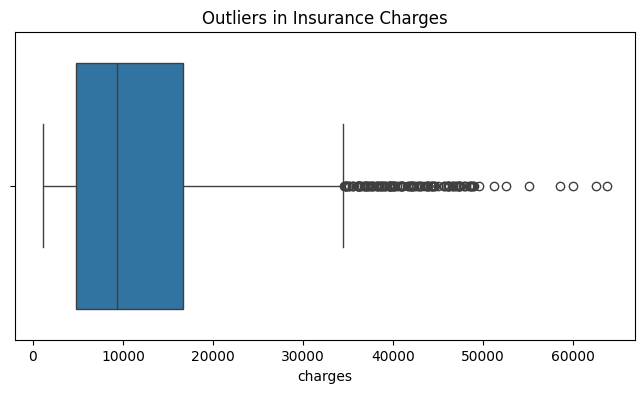

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df_preprocessed['charges'])
plt.title('Outliers in Insurance Charges')
plt.show()

In [132]:
Q1 = df_preprocessed['charges'].quantile(0.25)
Q3 = df_preprocessed['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_preprocessed[df_preprocessed['charges'] > upper_bound]

print(f"Upper Bound for outliers: ${upper_bound:.2f}")
print(f"Number of outliers: {len(outliers)}")
print(f"Maximum charge in data: ${df_preprocessed['charges'].max():.2f}")

Upper Bound for outliers: $34489.35
Number of outliers: 139
Maximum charge in data: $63770.43


In [138]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

X = df_preprocessed[['age', 'bmi', 'smoker']]
y = df_preprocessed['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

model2 = LinearRegression()
model2.fit(X_train, y_train)

y_pred_raw = model2.predict(X_test)
r2 = r2_score(y_test, y_pred_raw)
mae = mean_absolute_error(y_test, y_pred_raw)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_raw))

print(f"Final R2 Score: {r2:.4f}")
print(f"Final Mean Absolute Error: ${mae:.2f}")
print(f"Final RMSE: ${rmse:.2f}")

Final R2 Score: 0.7705
Final Mean Absolute Error: $4109.63
Final RMSE: $5865.60


better model


In [145]:
from sklearn.preprocessing import StandardScaler

features = ['age', 'bmi', 'smoker']
X = df_preprocessed[features]
y = df_preprocessed['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)


scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[['age', 'bmi']] = scaler.fit_transform(X_train[['age', 'bmi']])


y_train_log = np.log1p(y_train)


model = LinearRegression()
model.fit(X_train_scaled, y_train_log)


X_test_scaled = X_test.copy()
X_test_scaled[['age', 'bmi']] = scaler.transform(X_test[['age', 'bmi']])


y_pred_log = model.predict(X_test_scaled)


y_pred_final = np.expm1(y_pred_log)


r2 = r2_score(y_test, y_pred_final)
mae = mean_absolute_error(y_test, y_pred_final)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))

print(f"Final R2 Score: {r2:.4f}")
print(f"Final Mean Absolute Error: ${mae:.2f}")
print(f"Final RMSE: ${rmse:.2f}")

Final R2 Score: 0.6148
Final Mean Absolute Error: $4091.95
Final RMSE: $7599.42


In [148]:
#trying polynomial regression


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Setup and Preprocessing
df_poly = df.copy()

# Encode Smoker to 0 and 1
le = LabelEncoder()
df_poly['smoker'] = le.fit_transform(df_poly['smoker'])

# 2. Feature Engineering: Adding the Curve
# We keep BMI and add BMI squared to capture the upward curve for smokers
df_poly['bmi_2'] = df_poly['bmi'] ** 2

# Select our 4 key features
features = ['age', 'bmi', 'smoker', 'bmi_2']
X = df_poly[features]
y = df_poly['charges']

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

# 4. Standardize the numerical features
# Scaling is very important when using squared terms (bmi_2)
# because squared numbers grow very large and can confuse the model.
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

num_features = ['age', 'bmi', 'bmi_2']
X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])
X_test_scaled[num_features] = scaler.transform(X_test[num_features])

# 5. Train the Model
poly_model = LinearRegression()
poly_model.fit(X_train_scaled, y_train)

# 6. Predict and Evaluate
y_pred = poly_model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))


print(f"R2 Score: {r2:.4f}")
print(f"Mean Absolute Error: ${mae:.2f}")
print(f"RMSE: ${rmse:.2f}")



--- Polynomial Regression Results ---
R2 Score: 0.7658
Mean Absolute Error: $4259.24
RMSE: $5925.21

Feature Importance:
         Coefficient
age      3469.058098
bmi      6190.649512
smoker  23963.992563
bmi_2   -4164.497359
